# Exploratory Data Analysis (EDA)

Prepared by Keina Aoki

November 2023

## Introduction

In today's digital age, social media and online news sources offers quick access to vast amounts of data. Yet the creation and dissemination of fake news poses an emerging challenge as it has the potential to generate mistrust in persons and institutions. There are broadly two types of fake information: misinformation and disinformation. 1) Misinformation refers to information which is incorrect or misleading or taken out of context unsuspectingly shared by people. 2) Disinformation refers to false information spread deliberately with the intent to deceive public opinion. While both mis/disinformation exist because people want to share a certain narrative that aligns with their interests and beliefs, disinformation is more dangerous and damaging because its intention is to destabilize societies. It is meant to influence people's beliefs, attitudes and consequentially, their behavior by purposely only providing one side of a narrative. Nonetheless, disinformation poses a threat to democracy because it reinforces polarizing viewpoints.

The authenticity of news content has become difficult to discern not only because of social media algorithms that determine the content a user sees and interacts with, but because human minds are faulty to judgement about information. Thus, it is imperative to develop tools that can detect fake news to ensure that we are well informed.

This project aims to train a model to identify fake news through twitter posts (now known as X). It will employ machine learning techniques such as natural language processing and eventually use sentiment analysis to assess the credibility of a news story based on the emotion that the words in the statement elicits. The data set is sourced from https://www.unb.ca/cic/datasets/truthseeker-2023.html which includes fake and real news.

In this notebook, we explore and perform Exploratory Data Analysis (EDA) to uncover valuable insights from the data such as patterns and trends.

## Data Dictionary

Our dataset (Features_For_Traditional_ML.csv) includes the following fields:


| Name | Description   |
|:------|:------|
|  unique_count |number of unique, complex words|
|total_count |total number of words|
|ORG_percent | Percent of text including spaCy ORG tags (organizations, companies, agencies, institutions)
|NORP_percent |Percent of text including spaCy NORP tags (nationalities or religious or political groups)
|GPE_percent | Percent of text including spaCy GPE tags (countries, cities, states)
|PERSON_percent | Percent of text including spaCy PERSON tags (people, including fictional)
|MONEY_percent | Percent of text including spaCy MONEY tags (monetary values, including unit)
|DATE_percent | Percent of text including spaCy DATE tags (absolute or relative dates or periods)
|CARDINAL_percent | Percent of text including spaCy CARDINAL tags (numerals that do not fall under another type)
|PERCENT_percent | Percent of text including spaCy PERCENT tags (percentage, including "%")
|ORDINAL_percent | Percent of text including spaCy ORDINAL tags ("first", "second", etc.)
|FAC_percent | Percent of text including spaCy FAC tags (buildings, airports, highways, bridges, etc.)
|LAW_percent | Percent of text including spaCy LAW tags (named documents made into laws)
|PRODUCT_percent | Percent of text including spaCy PRODUCT tags (objects, vehicles, foods, etc. (not services))
|EVENT_percent | Percent of text including spaCy EVENT tags (named hurricanes, battles, wars, sports events, etc.)
|TIME_percent | Percent of text including spaCy TIME tags (times smaller than a day)
|LOC_percent | Percent of text including spaCy LOC tags (non-GPE locations, mountain ranges, bodies of water)
|WORK_OF_ART_percent | Percent of text including spaCy WOA tags (titles of books, songs, etc.)
|QUANTITY_percent | Percent of text including spaCy QUANTITY tags (measurements, as of weight or distance) 
|LANGUAGE_percent | Percent of text including spaCy LANGUAGE tags (any named language)
|Max Word | Length of the longest word in the sentence
|Min Word | Length of the shortest word in the sentence
|Avg Word Length | Average length of words in the sentence
|present_verb | Number of present tense verbs
|past_verb | Number of past tense verbs
|adjectives | Number of adjectives
|adverbs | Number of adverbs
|adpositions | Number of adpositions
|pronouns | Number of pronouns
|TO’s | Number of to usages
|determiners | Number of determiners
|conjunctions | Number of conjunctions
|dots | Number of (.) used
|exclamations | Number of (!) used
|question | Number of (?) used
|ampersand | Number of (&) used
|capitals | Number of capitalized letters
|digits | Number of digits (0-9) used
|word_count | Number of words
|long_word_freq | Number of long words
|short_word_freq | Number of short words
|followers_count | Number of followers
|friends_count | Number of friends
|favourites_count | Number of favourites across all tweets
|statuses_count | Number of tweets
|listed_count | Number of tweets the user has in lists
|mentions | Number of times the user was mentioned
|replies | Number of replies the user has
|retweets | Number of retweets the user has
|favourites | Number of favourites the user has
|hashtags | Number of hashtags (#) the user has used
|URLs | whether the user has a provided a url in relation to their profile
|quotes | Number of times the user has been quote tweeted
|BotScoreBinary | Binary score whether the user is considered a bot or not
|cred | Credibility score
|normalized_influence | Influence score the user has, normalized
|majority_target | Truth value of the tweet
|statement | Headline of a new article
|BinaryNumTarget | Binary representation of the statement's truth value (1 = True / 0 = False)
|tweet | Twitter posts related to the associated manual keywords

Note: spaCy tags refers to the spaCy natural language processing model that classifies text into categories

## Part 1: Data Exploration

In [100]:
# importing required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [101]:
# read data from csv file:
df = pd.read_csv("Features_For_Traditional_ML_Techniques.csv")

In [102]:
# sanity checks with the columns and the first 5 rows
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,embeddings,BotScore,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.540794,0.104602,1.0,1.0,1.0,3.0,10.0,0.0,1.0,5,6,0.333333,0.166667,0.166667,0.166667,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42,14,1,5.476190,1,1,1,0,4,1,0,0,0,5,0,1,0,33,3,5,19
1,1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.462177,0.094436,3.0,0.0,0.0,0.0,1.0,0.0,1.0,2,4,0.000000,0.250000,0.000000,0.750000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51,15,1,4.627451,7,2,2,0,5,8,2,0,2,1,0,0,0,14,0,2,34
2,2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]],0.03,0.0,0.096774,0.039846,0.0,2.0,5.0,0.0,0.0,0.0,1.0,1,1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,16,1,6.038462,0,0,7,3,1,0,1,0,1,0,0,0,0,3,0,4,10
3,3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.540794,0.104602,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6,0.000000,0.333333,0.000000,0.166667,0.166667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,10,2,4.653061,4,6,3,2,7,1,1,0,1,3,0,0,1,6,8,1,30
4,4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.296610,0.061135,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3,3,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,12,1,5.121212,2,2,2,3,2,2,0,0,1,3,0,1,0,11,3,2,19


In [103]:
# remove the column 'Unnamed: 0' as it is just an index
df = df.drop(['Unnamed: 0'], axis=1)

# remove the collowing as there are no documentation on it and may skew the data later on
df = df.drop(['following'], axis=1)
df = df.drop(['embeddings'], axis=1)
df = df.drop(['BotScore'], axis=1)

In [104]:
# sanity check after dropping columns
df.head()

,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,0.0,0.540794,0.104602,1.0,1.0,1.0,3.0,10.0,0.0,1.0,5,6,0.333333,0.166667,0.166667,0.166667,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42,14,1,5.476190,1,1,1,0,4,1,0,0,0,5,0,1,0,33,3,5,19
1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,0.0,0.462177,0.094436,3.0,0.0,0.0,0.0,1.0,0.0,1.0,2,4,0.000000,0.250000,0.000000,0.750000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51,15,1,4.627451,7,2,2,0,5,8,2,0,2,1,0,0,0,14,0,2,34
2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,0.0,0.096774,0.039846,0.0,2.0,5.0,0.0,0.0,0.0,1.0,1,1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,16,1,6.038462,0,0,7,3,1,0,1,0,1,0,0,0,0,3,0,4,10
3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,0.0,0.540794,0.104602,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6,0.000000,0.333333,0.000000,0.166667,0.166667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,10,2,4.653061,4,6,3,2,7,1,1,0,1,3,0,0,1,6,8,1,30
4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,0.0,0.296610,0.061135,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3,3,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,12,1,5.121212,2,2,2,3,2,2,0,0,1,3,0,1,0,11,3,2,19


In [105]:
# sanity checks with the last 5 rows
df.tail()

,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
134193,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,0.0,0.438041,0.098915,0.0,1.0,1.0,1.0,2.0,0.0,1.0,1,3,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,16,1,4.900000,4,3,2,2,8,2,0,0,2,1,0,3,0,31,0,4,32
134194,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"Joe Bidens great, great grandfather was a slav...",1636.0,1626.0,215290.0,44011.0,10.0,0.0,0.501533,0.096203,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2,2,0.500000,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,14,2,5.947368,3,0,1,0,3,2,0,0,0,1,0,0,0,16,6,2,8
134195,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",286.0,2501.0,28377.0,7617.0,1.0,0.0,0.102619,0.076870,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,0.000000,0.0,0.000000,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54,9,1,4.222222,7,2,5,5,7,4,2,1,4,1,0,0,1,2,4,0,37
134196,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,2.0,45.0,16.0,509.0,0.0,0.0,0.042553,0.024038,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,13,2,5.333333,3,0,3,2,1,1,0,1,0,3,0,0,0,0,0,1,11
134197,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,@sunny Yes representation matters. Did you kno...,178.0,471.0,1254.0,2094.0,0.0,0.0,0.274268,0.070342,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,3,0.333333,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,9,2,4.420000,7,1,3,1,7,5,1,0,1,2,0,1,0,6,0,0,30


In [106]:
# display dimensions of data:
df.shape
print(f'data includes {df.shape[0]} rows and {df.shape[1]} columns.')

data includes 134198 rows and 60 columns.


In [107]:
# summary of Features_For_Traditional_ML_Techniques:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 60 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   majority_target         134198 non-null  bool   
 1   statement               134198 non-null  object 
 2   BinaryNumTarget         134198 non-null  float64
 3   tweet                   134198 non-null  object 
 4   followers_count         134198 non-null  float64
 5   friends_count           134198 non-null  float64
 6   favourites_count        134198 non-null  float64
 7   statuses_count          134198 non-null  float64
 8   listed_count            134198 non-null  float64
 9   BotScoreBinary          134198 non-null  float64
 10  cred                    134198 non-null  float64
 11  normalize_influence     134198 non-null  float64
 12  mentions                134198 non-null  float64
 13  quotes                  134198 non-null  float64
 14  replies             

Findings:
- All the columns have 134198.
- df contains 57 numerical columns. 22 of the columns are integer, the rest are float. 
- df contains 3 categorical columns. This includes the statements and twees which are objects. Majority target is a boolean.

In [108]:
df.describe()

,BinaryNumTarget,followers_count,friends_count,favourites_count,statuses_count,listed_count,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
count,134198.000000,1.341980e+05,134198.000000,1.341980e+05,1.341980e+05,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.00000,134198.000000,134198.000000,134198.000000,134198.00000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000
mean,0.513644,1.129308e+04,1893.454455,3.298123e+04,3.419576e+04,73.300198,0.032355,0.405852,0.077665,1.388918,0.573406,1.914201,6.674354,27.572386,0.104726,0.737701,2.365624,3.441229,0.199964,0.067412,0.136151,0.221930,0.029525,0.102339,0.091104,0.030638,0.012432,0.003352,0.005265,0.006839,0.002607,0.005662,0.009771,0.008517,0.002396,0.001011,35.077691,13.062043,1.399857,5.056648,2.452354,1.81221,3.034308,1.575873,3.619644,1.49582,0.788626,0.135583,1.003495,2.366116,0.259408,0.307151,0.121537,12.831905,3.559494,2.249557,21.438658
std,0.499816,4.374971e+05,6997.695671,6.878021e+04,7.510120e+04,1083.274277,0.176942,0.239223,0.026184,1.471604,28.436726,122.041183,406.542579,1831.425703,0.458687,0.439886,1.351617,2.479373,0.276376,0.165502,0.242561,0.298133,0.106880,0.206059,0.190366,0.116949,0.070884,0.037525,0.048690,0.053513,0.032400,0.046830,0.070224,0.062580,0.030757,0.019590,13.604442,3.044782,2.795407,0.825737,2.049247,1.73699,2.012125,1.546382,2.195625,1.63947,0.961242,0.379235,1.086844,2.140459,0.903957,0.774367,0.453865,15.557524,6.674458,2.912136,9.625147
min,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000e+01,168.000000,1.356000e+03,3.046000e+03,0.000000,0.000000,0.223684,0.061814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,11.000000,1.000000,4.571429,1.000000,0.00000,2.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,14.000000
50%,1.000000,3.540000e+02,567.000000,8.377000e+03,1.101900e+04,2.000000,0.000000,0.386691,0.079436,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [109]:
# check the number of missing values for columns:
df.isna().sum()

majority_target           0
statement                 0
BinaryNumTarget           0
tweet                     0
followers_count           0
friends_count             0
favourites_count          0
statuses_count            0
listed_count              0
BotScoreBinary            0
cred                      0
normalize_influence       0
mentions                  0
quotes                    0
replies                   0
retweets                  0
favourites                0
hashtags                  0
URLs                      0
unique_count              0
total_count               0
ORG_percentage            0
NORP_percentage           0
GPE_percentage            0
PERSON_percentage         0
MONEY_percentage          0
DATE_percentage           0
CARDINAL_percentage       0
PERCENT_percentage        0
ORDINAL_percentage        0
FAC_percentage            0
LAW_percentage            0
PRODUCT_percentage        0
EVENT_percentage          0
TIME_percentage           0
LOC_percentage      

There are no missing values.

In [110]:
# check for exact duplicates in rows:
df.duplicated().sum()

0

There are no duplicate rows.

## Part 2: EDA

Here we will being exploring the data to gain insights and identify patterns and trends:

### Correlation

In [111]:
# check correlation of numerical data
df_num = df.select_dtypes(include = "number")
df_num.corr()

,BinaryNumTarget,followers_count,friends_count,favourites_count,statuses_count,listed_count,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
BinaryNumTarget,1.000000,0.013712,0.029014,0.044088,0.077732,0.033798,-0.012912,0.111584,0.131866,-0.049086,-0.007470,-0.005278,-0.002832,-0.003763,0.105710,-0.136375,0.071814,0.040115,-0.038610,0.057028,0.047484,-0.111567,0.077220,0.025115,0.075818,0.038205,0.010510,-0.022373,0.029426,-0.006000,0.021909,-0.020769,0.007956,-0.020495,-0.009830,0.038365,-0.079875,-0.012994,0.011125,0.045793,-0.092082,-0.092284,0.052809,-0.049680,0.022727,-0.114162,-0.051943,-0.024640,-0.045761,-0.024325,-0.068000,-0.044242,-0.004879,-0.081786,0.006398,-0.010910,-0.087121
followers_count,0.013712,1.000000,0.206958,-0.001963,0.031071,0.815270,-0.004687,0.055394,0.083034,-0.017852,0.079789,0.054423,0.071994,0.071982,0.007529,-0.009708,0.001381,0.004600,0.000240,-0.001922,-0.001564,-0.005296,0.000207,-0.000400,0.010215,0.004105,0.000424,-0.001210,-0.000223,-0.000481,0.001270,-0.001262,-0.002079,-0.001063,-0.000013,-0.000594,0.002037,-0.000339,0.002193,0.003860,0.000161,0.000456,0.001941,0.001267,-0.000124,-0.003215,0.000916,0.003797,-0.002829,-0.002065,-0.002482,-0.001470,-0.000403,-0.001020,0.007329,0.005264,-0.000880
friends_count,0.029014,0.206958,1.000000,0.174073,0.242490,0.183237,-0.046619,0.085949,0.330636,-0.048792,0.026679,0.015716,0.019105,0.016180,0.032510,-0.028249,0.004991,0.002637,0.003323,-0.003502,0.000792,0.006480,-0.004051,-0.004151,0.004322,-0.004220,-0.001920,-0.002813,0.001866,0.000963,0.000316,0.001726,-0.003306,-0.000950,-0.000681,0.002948,-0.004035,-0.005967,0.000259,0.004759,-0.003704,-0.002083,-0.003082,-0.001503,-0.003366,-0.004953,-0.003690,-0.001293,-0.003196,-0.001201,-0.001837,-0.002834,0.002092,0.002057,-0.001774,-0.002530,-0.004841
favourites_count,0.044088,-0.001963,0.174073,1.000000,0.451122,0.003835,-0.086887,0.160016,0.352784,0.042600,0.002138,0.001230,0.002114,0.001834,-0.029796,0.036570,0.008694,0.005757,-0.002824,0.006220,-0.000006,0.007236,0.000846,-0.005225,0.004521,-0.000650,-0.002367,-0.004517,0.002215,0.001386,0.000400,0.005698,-0.001352,0.001038,-0.004999,0.002758,0.004263,0.005405,-0.000389,0.009672,0.003788,0.000062,0.007039,0.000303,0.006091,-0.001241,-0.003260,-0.007260,0.008042,-0.000889,-0.005345,0.002904,0.001924,-0.001352,-0.001511,0.006672,0.001144
statuses_count,0.077732,0.031071,0.242490,0.451122,1.000000,0.087866,-0.061007,0.251248,0.409079,-0.062732,0.002884,0.000829,0.001637,0.000696,0.061131,-0.092733,0.004661,-0.001309,-0.001481,-0.002349,0.000102,0.006381,0.001417,-0.003267,0.005818,-0.002045,-0.003882,-0.001034,0.005901,-0.000637,0.001655,0.004182,-0.003563,0.002530,-0.001990,0.007075,-0.005755,-0.008494,0.000388,0.001992,-0.000187,-0.008338,-0.000082,-0.002231,-0.002488,-0.003842,-0.000238,-0.002723,0.000461,-0.001357,-0.004536,-0.000674,0.001831,-0.005132,-0.005509,-0.003512,-0.004434
listed_count,0.033798,0.815270,0.183237,0.003835,0.087866,1.000000,-0.012262,0.130254,0.167132,-0.041624,0.072833,0.054967,0.075152,0.070535,0.023245,-0.029160,0.000551,0.000829,-0.000864,-0.001920,-0.002290,-0.004858,-0.000446,-0.001696,0.010689,0.004752,0.000123,-0.001009,0.002389,0.000392,0.000400,-0.002088,-0.004512,0.001426,-0.000611,-0.000499,-0.005481,-0.003077,0.002770,0.003237,-0.004260,-0.002329,-0.001100,-0.001916,-0.004105,-0.007310,-0.

<Axes: >

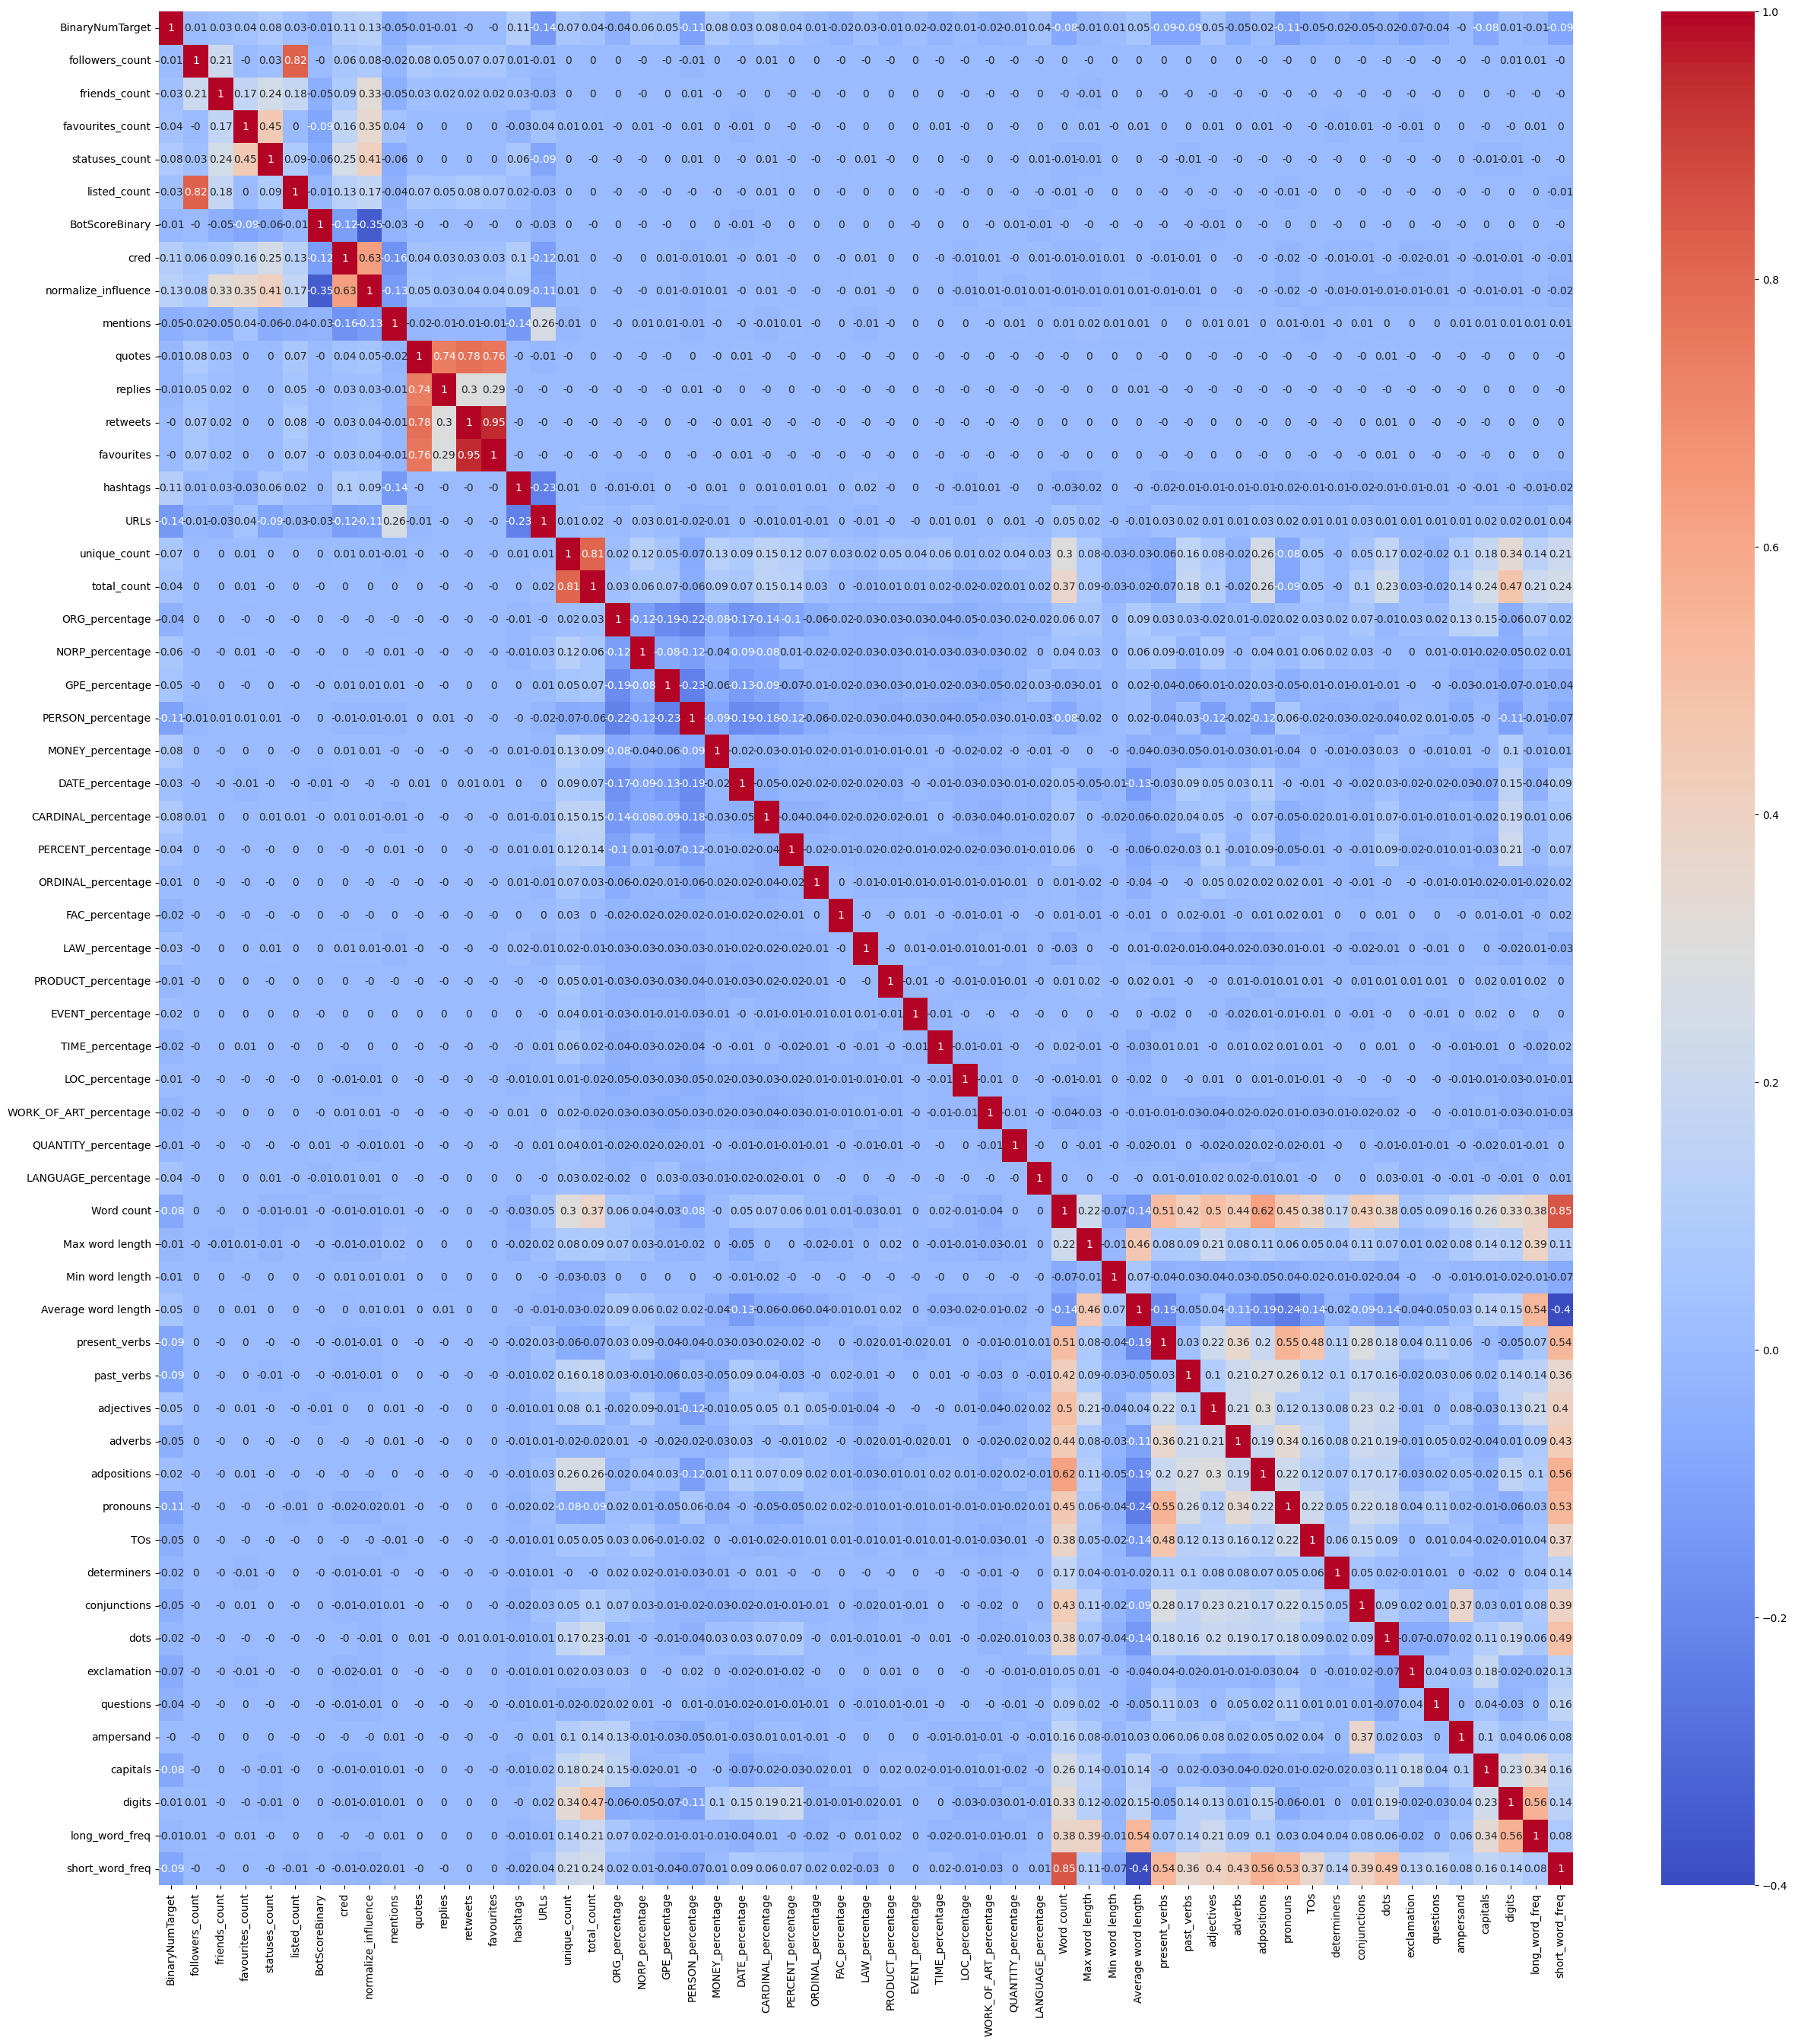

In [112]:
# display the heatmap for correlation matrix:
plt.figure(figsize= (30, 32))
sns.heatmap(round(df_num.corr(),2), cmap='coolwarm', annot=True)

Findings:
- normalize_influence (influence score that the user has) and cred (credibility score) has a positive correlation of approximately 0.63. This is expected as users with high credibility are more likely to have a higher influence score.
- listed count (number of tweets the user has in lists) and followers count has a strong positive correlation of approximately 0.82
- quotes have a positive correlation with replies (0.74), retweets (0.78), and favourites (0.76). This could be explained by the fact that quotes refer to the "Number of times the user has been quote tweeted" which could be in the from of replies to that tweet, retweeting that exact tweet, or favourited.
- There is also a very high positive correlation between retweets and favourites (0.95), as these two have similar functions in liking or sharing a particular tweet.
- the total count (total number of words) and unique count (total number of unique words) has a positive correlation of approximately 0.81. 
- word count and short word frequency has a positive correlation of approximately 0.83. This means that the word count of a tweet are composed of seveal short words.

### Create Scatterplots for Columns with High Correlation

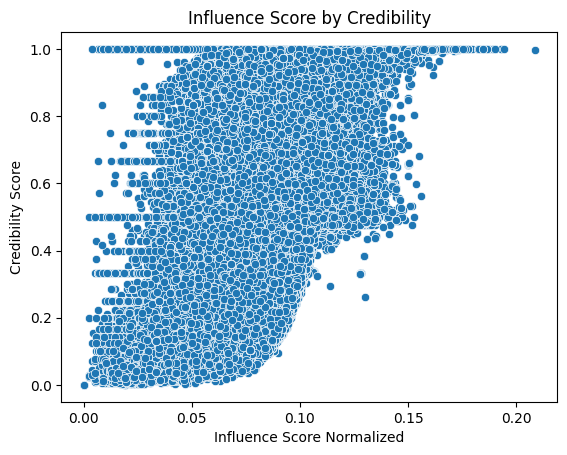

In [113]:
# scatterplot for influence score and credibility score
plt.figure()
sns.scatterplot(x="normalize_influence", y="cred", data=df)
plt.title("Influence Score by Credibility")
plt.xlabel("Influence Score Normalized")
plt.ylabel("Credibility Score")
plt.show()

Finding:
- The highest credibility score that can be assigned to a user is 1.
- There appears to be a positive correlation where an increase in either the credibility score or influence score increases the other variable.

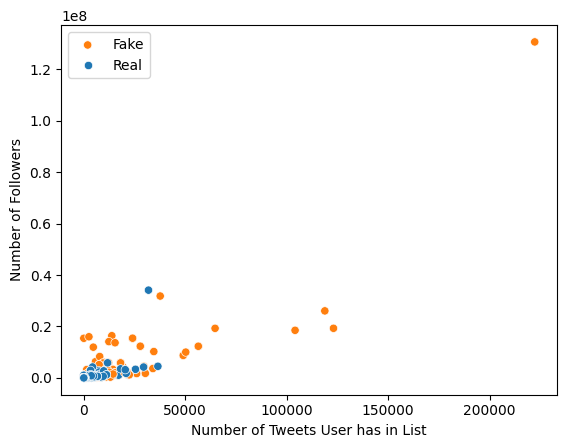

In [114]:
# scatterplot for listed count and follower count
plt.figure()
sns.scatterplot(x="listed_count", y="followers_count", hue="BinaryNumTarget",data=df)
plt.xlabel("Number of Tweets User has in List")
plt.ylabel("Number of Followers")
plt.legend(labels = ["Fake", "Real"])
plt.show()

Finding:
- The scatterplot displays a slight positive correlation, however it is mostly characterized by the outliers.
- Fake news has more outliers compared to Real news.

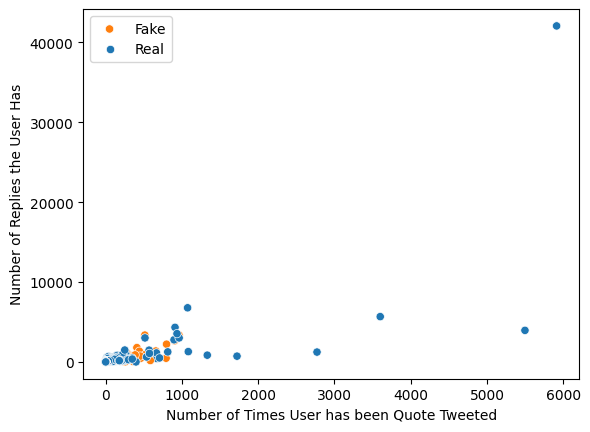

In [115]:
# scatterplot for quotes and replies
plt.figure()
sns.scatterplot(x="quotes", y="replies", hue="BinaryNumTarget",data=df)
plt.xlabel("Number of Times User has been Quote Tweeted")
plt.ylabel("Number of Replies the User Has")
plt.legend(labels = ["Fake", "Real"])
plt.show()

Finding:
- The scatterplot displays a slight positive correlation.
- The datapoints that make up the linear correlation are mostly Real news indicating that there is a positive relationship between the number of replies a user has the number of times a user has been quoted.

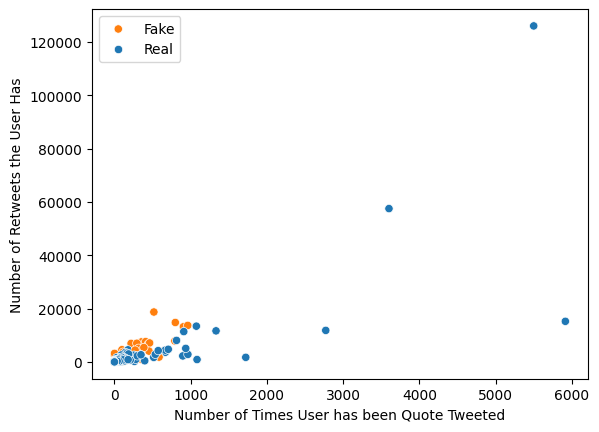

In [116]:
# scatterplot for quotes and retweets
plt.figure()
sns.scatterplot(x="quotes", y="retweets", hue="BinaryNumTarget",data=df)
plt.xlabel("Number of Times User has been Quote Tweeted")
plt.ylabel("Number of Retweets the User Has")
plt.legend(labels = ["Fake", "Real"])
plt.show()

Finding:
- The scatterplot displays a slight positive correlation.
- The datapoints that make up the linear correlation are mostly Real news indicating that there is a positive relationship between the number of retweets a user has the number of times a user has been quoted.

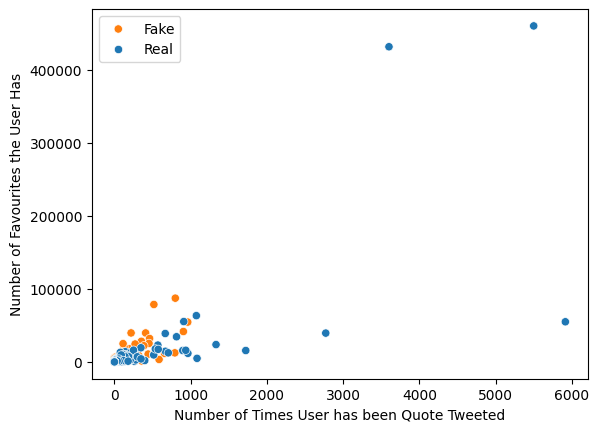

In [117]:
# scatterplot for quotes and favourites
plt.figure()
sns.scatterplot(x="quotes", y="favourites", hue="BinaryNumTarget",data=df)
plt.xlabel("Number of Times User has been Quote Tweeted")
plt.ylabel("Number of Favourites the User Has")
plt.legend(labels = ["Fake", "Real"])
plt.show()

Finding:
- The scatterplot displays a slight positive correlation.
- The datapoints that make up the linear correlation are mostly Real news indicating that there is a positive relationship between the number of favourites a user has the number of times a user has been quoted.

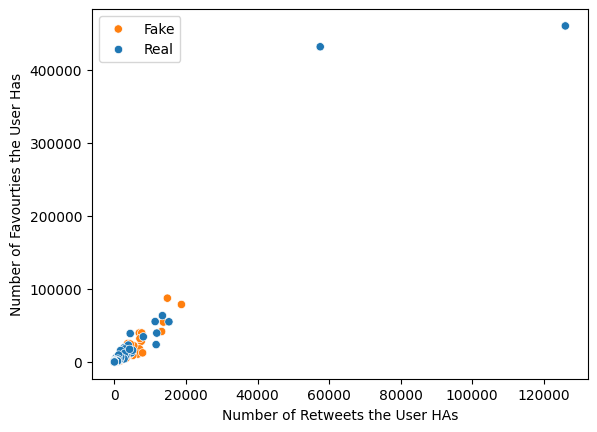

In [118]:
# scatterplot for retweet and favourites
plt.figure()
sns.scatterplot(x="retweets", y="favourites", hue="BinaryNumTarget",data=df)
plt.xlabel("Number of Retweets the User HAs")
plt.ylabel("Number of Favourties the User Has")
plt.legend(labels = ["Fake", "Real"])
plt.show()

Finding:
- The scatterplot displays a slight positive correlation. However, it is very difficult to tell given that most of the datapoints are clustered.
- The outliers are datapoints from Real News.

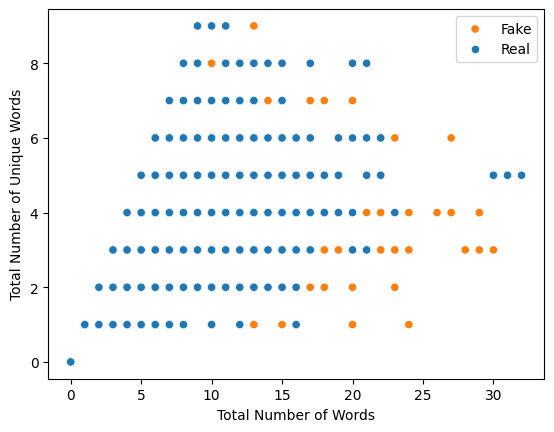

In [119]:
# scatterplot for total count and unique count
plt.figure()
sns.scatterplot(x="total_count", y="unique_count", hue="BinaryNumTarget",data=df)
plt.xlabel("Total Number of Words")
plt.ylabel("Total Number of Unique Words")
plt.legend(labels = ["Fake", "Real"])
plt.show()

Finding:
- The scatterplot does not display a linear correlation between the total number of unique words and total number of words.

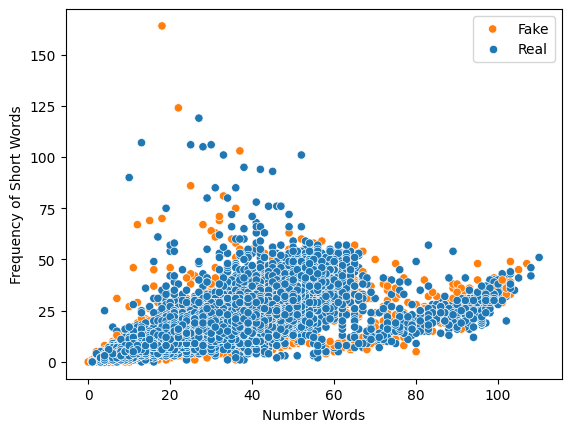

In [120]:
# scatterplot for word count and short words
plt.figure()
sns.scatterplot(x="Word count", y="short_word_freq", hue="BinaryNumTarget",data=df)
plt.xlabel("Number Words")
plt.ylabel("Frequency of Short Words")
plt.legend(labels = ["Fake", "Real"])
plt.show()

Findings:
- The number of words does not exhibit a notable linear correlation with the frequency of short words.

### EDA on Fake vs. Real News

In [121]:
# check the total number of fake and real news
df["BinaryNumTarget"].value_counts()

BinaryNumTarget
1.0    68930
0.0    65268
Name: count, dtype: int64

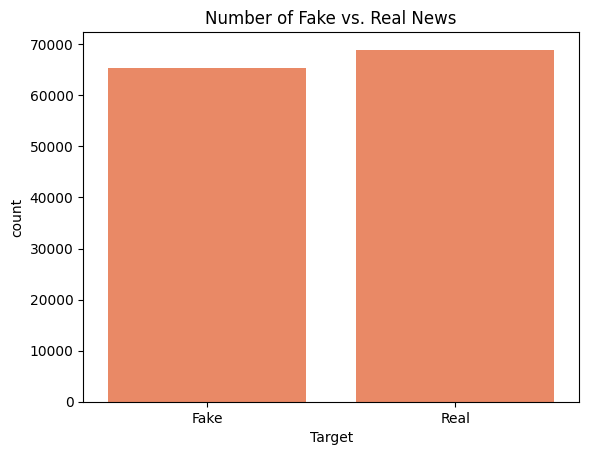

In [122]:
plt.figure()
tgtcnt = sns.countplot(x="BinaryNumTarget", data=df, color="coral")
tgtcnt.set(title="Number of Fake vs. Real News")
tgtcnt.set_xticks([0,1])
tgtcnt.set_xticklabels(["Fake", "Real"])
plt.xlabel("Target")
plt.show()

Finding:
- There are more real news than fake news in this dataset.

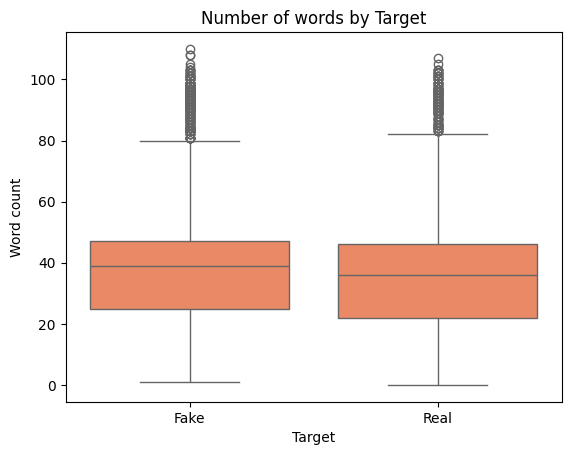

In [123]:
# plot the word count in statement by target
plt.figure()
wrdcnt = sns.boxplot(x="BinaryNumTarget", y="Word count", data=df, color="coral")
wrdcnt.set(title = "Number of words by Target")
wrdcnt.set_xticks([0,1])
wrdcnt.set_xticklabels(["Fake", "Real"])
plt.xlabel("Target")
plt.show()

Finding:
- The median for the number of words in the news does not differ very much between Fake and Real News.

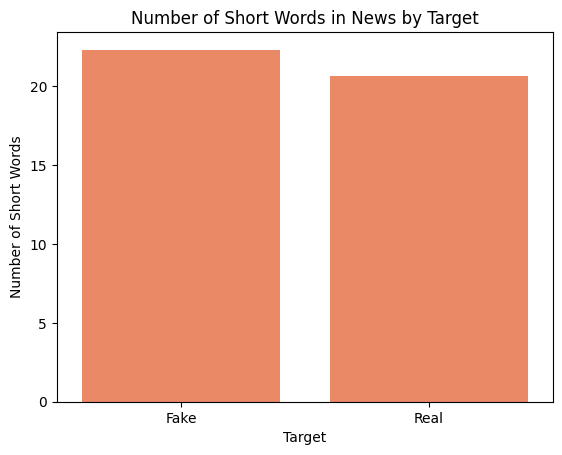

In [124]:
# plot the number of short words by target
plt.figure()
shrt_freq = sns.barplot(y="short_word_freq", x="BinaryNumTarget", data=df, color="coral", errorbar=None)
shrt_freq.set(title= "Number of Short Words in News by Target")
shrt_freq.set_ylabel("Number of Short Words")
shrt_freq.set_xticks([0,1])
shrt_freq.set_xticklabels(["Fake", "Real"])
plt.xlabel("Target")
plt.show()

Finding:
- There are more short words in fake news compared to real news.

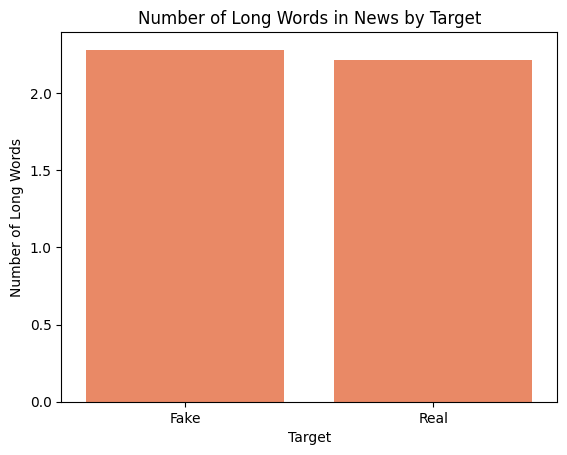

In [125]:
# plot the number of long words by target
plt.figure()
shrt_freq = sns.barplot(y="long_word_freq", x="BinaryNumTarget", data=df, color="coral", errorbar=None)
shrt_freq.set(title= "Number of Long Words in News by Target")
shrt_freq.set_ylabel("Number of Long Words")
shrt_freq.set_xticks([0,1])
shrt_freq.set_xticklabels(["Fake", "Real"])
plt.xlabel("Target")
plt.show()

Finding:
- There are more long words in fake news compared to real news.

In [126]:
# split data by target
fake = df[(df["BinaryNumTarget"] == 0)]
real = df[(df["BinaryNumTarget"] == 1)]

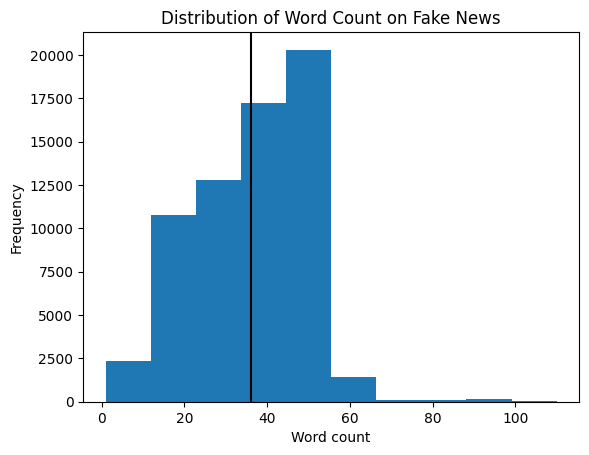

In [127]:
# distribution of word count in Fake News
plt.figure()
plt.hist(fake["Word count"])
plt.axvline(fake["Word count"].mean(), c='black', label='Mean')
plt.title("Distribution of Word Count on Fake News")
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.show()

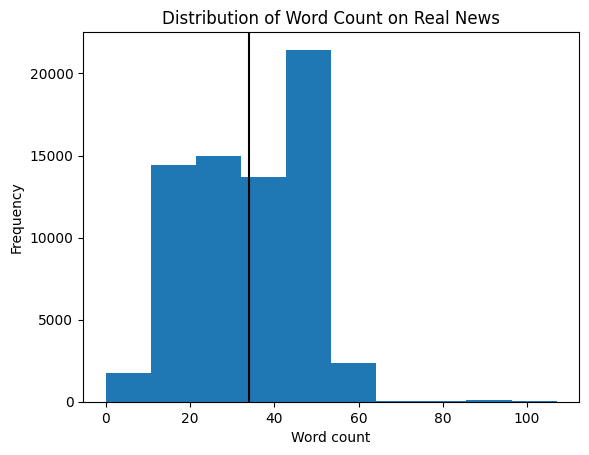

In [128]:
# distribution of word count in Real News
plt.figure()
plt.hist(real["Word count"])
plt.axvline(real["Word count"].mean(), c='black', label='Mean')
plt.title("Distribution of Word Count on Real News")
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.show()

Finding:
- The frequency of the word count in fake news is more normalized compared to the real news.
- The fake news shows a greater left skew.

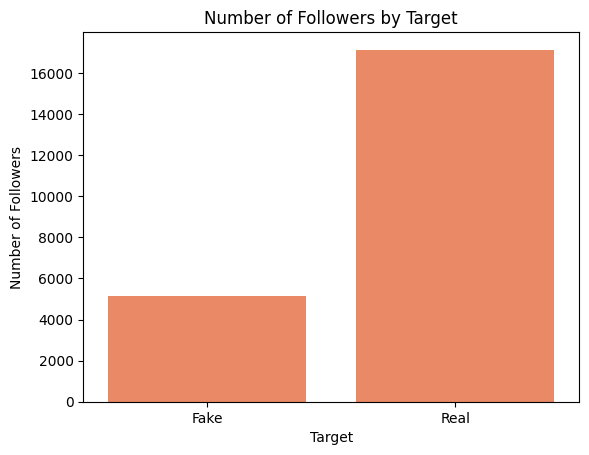

In [129]:
# plot the number of followers by target
plt.figure()
shrt_freq = sns.barplot(y="followers_count", x="BinaryNumTarget", data=df, color="coral", errorbar=None)
shrt_freq.set(title= "Number of Followers by Target")
shrt_freq.set_ylabel("Number of Followers")
shrt_freq.set_xticks([0,1])
shrt_freq.set_xticklabels(["Fake", "Real"])
plt.xlabel("Target")
plt.show()

Finding:
- Users posting real news has more followers comapred to users posting fake news.

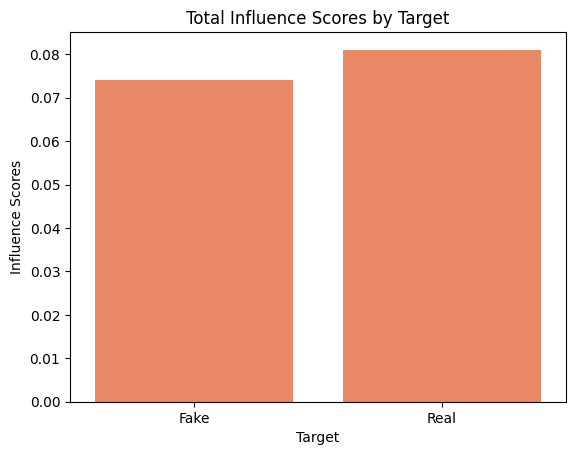

In [130]:
# plot the influence score by target
plt.figure()
shrt_freq = sns.barplot(y="normalize_influence", x="BinaryNumTarget", data=df, color="coral", errorbar=None)
shrt_freq.set(title= "Total Influence Scores by Target")
shrt_freq.set_ylabel("Influence Scores")
shrt_freq.set_xticks([0,1])
shrt_freq.set_xticklabels(["Fake", "Real"])
plt.xlabel("Target")
plt.show()

Finding:
- Users posting real news has a greater influence score.# plot the number of followers by target.

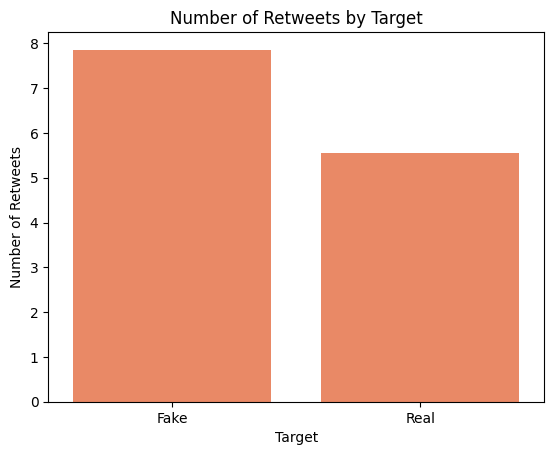

In [131]:
# plot the number of retweets by target
plt.figure()
shrt_freq = sns.barplot(y="retweets", x="BinaryNumTarget", data=df, color="coral", errorbar=None)
shrt_freq.set(title= "Number of Retweets by Target")
shrt_freq.set_ylabel("Number of Retweets")
shrt_freq.set_xticks([0,1])
shrt_freq.set_xticklabels(["Fake", "Real"])
plt.xlabel("Target")
plt.show()

Finding:
- Fake news has more retweets compared to real news.

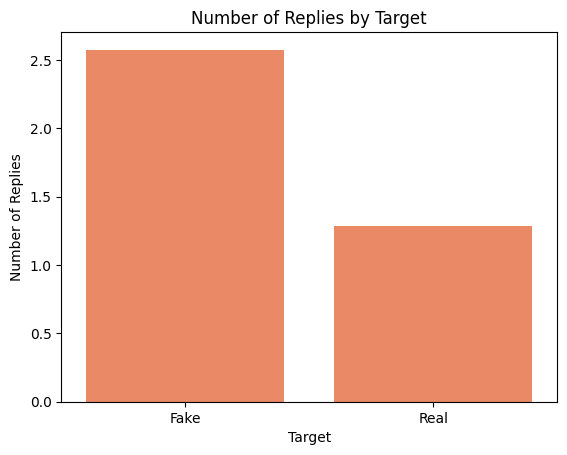

In [132]:
# plot the number of replies by target
plt.figure()
shrt_freq = sns.barplot(y="replies", x="BinaryNumTarget", data=df, color="coral", errorbar=None)
shrt_freq.set(title= "Number of Replies by Target")
shrt_freq.set_ylabel("Number of Replies")
shrt_freq.set_xticks([0,1])
shrt_freq.set_xticklabels(["Fake", "Real"])
plt.xlabel("Target")
plt.show()

Finding:
- Fake news has a greater number of replies comapred to real news.